In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-nlp/nlp_sug.csv
/kaggle/input/cleaned-data-cy/Cleaned_Data.csv


In [9]:
#importing nessesary packages
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
from bs4 import BeautifulSoup
import re
import nltk
from dateutil.parser import parse
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans 
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cdist
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import time
import json

In [10]:
#Loading data from csv
data_path = "../input/cleaned-data-cy/Cleaned_Data.csv"
#save_path = os.path.join(os.path.dirname(__file__),"nlp_sug.csv")
data = pd.read_csv(data_path)

In [21]:
"""
Create Bag of Words
"""
def counter_vec(bow):
    """
    Vectorizing the text using Countervectorizer
    """
#     tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english')
#     tf_idf = tf_idf_vectorizor.fit_transform(bow)
#     tf_idf_norm = normalize(tf_idf)
    #tf_idf_array = tf_idf_norm.toarray()

    vectorizer_var = CountVectorizer()
    vectorizer_var.fit(bow)
    X = vectorizer_var.transform(bow)#.toarray()
    return X,vectorizer_var
    #return tf_idf_norm,tf_idf_vectorizor


def get_top_keywords(data, clusters, labels, n_terms):
    """
    top keywords from the extracted features
    """
    df = pd.DataFrame(data).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

        
def plot_elbow_silhouette(X,random_state):
    """
    Plotting the elbow method squared scores and 
    silhouette scores inorder to find the best bluster number
    """
    elbow = []
    K = range(2,21) 
    sil = []
    sil_score = 0
    sta = time.time()
    for k in K: 
        print("At Cluster @k=",k)
        print((time.time()-sta)/60)
        sta = time.time()
        #Building and fitting the model 
        kmeanModel = KMeans(n_clusters=k,random_state=random_state)#.fit(X) 
        kmeanModel.fit(X)  
        clusters = kmeanModel.labels_
        cluster_labels = kmeanModel.predict(X)
        
        sil_score = silhouette_score(X, cluster_labels, metric = 'euclidean')
        
        elbow.append(kmeanModel.inertia_)
        sil.append(sil_score)

    return sil,elbow,K

def plot_find_bestcluster(sil_score,elbow,K):
    """
    plotting the error plot and coefficient plot
    """
    print("-- Method - 1 - Elbow Method")
    figure(figsize=(8,6))
    plt.plot(K, elbow) 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method using Inertia') 
    plt.show() 


    figure(figsize=(8,6))
    print("-- Method - 2 - Silhouette Coefficient Method")  
    plt.plot(K, sil_score)
    plt.xlabel('Values of K')
    plt.ylabel('Silhouette Scores') 
    plt.title('Silhouette Coefficient Method') 
    plt.show()
    
    
def best_cluster(c,X,df_data,col,featurenames):
    """
    clustering the best cluster
    """
    kmeans_best = KMeans(n_clusters = c, random_state=3)
    kmeans_best.fit(X)
    print("-----------------------Fit complete---------------------------")
    pred = kmeans_best.predict(X)

    df_data[col] = pred
    print(df_data[col].value_counts())

#     print("Plotting the cluster - ",c)
#     print(plot_tsne_pca(X, pred,random_state))
    print("Plotting Top words in the clusters - ",c)
    try:
        print(get_top_keywords(X.todense(), pred, featurenames, 20))
    except:
        print(get_top_keywords(X, pred, featurenames, 20))
    return kmeans_best,df_data


Vectorizing the text using Countervectorizer

Finding the best number of clusters
At Cluster @k= 2
1.02996826171875e-05
At Cluster @k= 3
3.574247407913208
At Cluster @k= 4
3.776070940494537
At Cluster @k= 5
4.114899472395579
At Cluster @k= 6
4.48301526705424
At Cluster @k= 7
4.723946062723796
At Cluster @k= 8
4.763539016246796
At Cluster @k= 9
4.667958029111227
At Cluster @k= 10
4.815893518924713
At Cluster @k= 11
4.965595968564352
At Cluster @k= 12
5.09606808423996
At Cluster @k= 13
5.1931823015213014
At Cluster @k= 14
5.326968256632487
At Cluster @k= 15
5.441870244344075
At Cluster @k= 16
5.750476467609405
At Cluster @k= 17
5.865915520985921
At Cluster @k= 18
5.98147744735082
At Cluster @k= 19
6.2270599444707235
At Cluster @k= 20
6.464337726434072
-- Method - 1 - Elbow Method


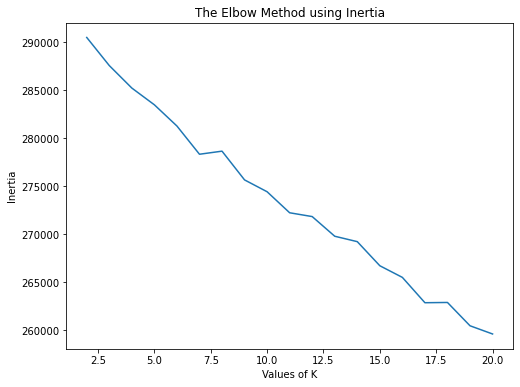

-- Method - 2 - Silhouette Coefficient Method


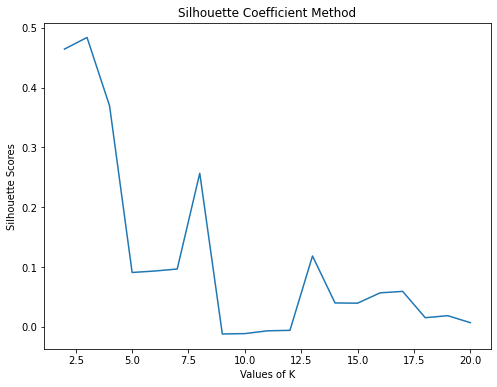

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data["Content of Post"],test_size=0.50, random_state=7,shuffle = True)
random_state = 27

# CountVectorizer
print()
print("Vectorizing the text using Countervectorizer")

print()
# bag of words
bow = X_train.tolist()
X_count,vectorizer_var = counter_vec(bow)
featurenames_count = vectorizer_var.get_feature_names()

#Elbow Method and Silhouette Coefficient  Method 
print("Finding the best number of clusters")
sil_score,elbow,K = plot_elbow_silhouette(X_count.toarray(),random_state)
plot_find_bestcluster(sil_score,elbow,K)

In [13]:
#best cluster number
c = np.argmax(sil_score) + 2
print(c)

3


In [14]:
#Code to get Best Cluster
#
print()
print("Clustering the Counter Vectorized data")
#c = 3
print("-- Best Cluster number - ",c)
kmeans_count,df_data = best_cluster(c,X_count.toarray(),data,'Predicted',featurenames_count)


Clustering the Counter Vectorized data
-- Best Cluster number -  3
-----------------------Fit complete---------------------------
Plotting Top words in the clusters -  3

Cluster 0
data,threat,learn,thrill,ipexpo,rsaconference,blackhatevents,story,important,hope,cybersecurity,share,see,exclusive,cyberdefensemag,miliefsky,publisher,cyber,security,cdm

Cluster 1
observe,covid19,need,dear,society,respect,child,state,get,care,feel,day,emergency,make,service,one,dial100,citizen,every,police

Cluster 2
data,know,free,one,day,get,parent,kid,time,attack,hacker,bullying,use,cdttweets,child,online,new,hack,security,cyber
None


In [18]:
#print(df_data["Predicted"])
print(df_data.columns)

Index(['pagename', 'Type/Organization', 'NameTag of Page',
       'NameTag in Content', 'HashTag in Content', 'Number of Likes',
       'Number of Followers', 'Posted Date', 'Content of Post', 'Label',
       'Tokens', 'Word Count', 'Unique Words'],
      dtype='object')


In [23]:
x_df=pd.DataFrame(X_count,columns=["X_count"])
kmeans_count,df_data = best_cluster(c,X_count.toarray(),x_df,'Predicted',featurenames_count)

-----------------------Fit complete---------------------------
2    17808
1      796
0      273
Name: Predicted, dtype: int64
Plotting Top words in the clusters -  3

Cluster 0
data,threat,learn,thrill,ipexpo,rsaconference,blackhatevents,story,important,hope,cybersecurity,share,see,exclusive,cyberdefensemag,miliefsky,publisher,cyber,security,cdm

Cluster 1
observe,covid19,need,dear,society,respect,child,state,get,care,feel,day,emergency,make,service,one,dial100,citizen,every,police

Cluster 2
data,know,free,one,day,get,parent,kid,time,attack,hacker,bullying,use,cdttweets,child,online,new,hack,security,cyber
None


In [25]:
print(df_data.columns)

Index(['X_count', 'Predicted'], dtype='object')
